In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [7]:
mobile_df = pd.read_csv('cleaned_item_details.csv')
mobile_df

,Brand and Model,Status,SIM Count,Brand Origin,Internal Storage(GB),RAM(GB),Price(Toman),Color
0,سامسونگ Galaxy Note20 Ultra 5G,در حد نو,2,اصل,256.0,12.000,24600000,سفید
1,سامسونگ Galaxy A7 (2017),در حد نو,2,اصل,32.0,3.000,2500000,طلایی
2,اپل iPhone 11 Pro Max,در حد نو,1,اصل,256.0,4.000,32000000,خاکستری
3,سامسونگ Galaxy M31s,کارکرده,2,اصل,128.0,8.000,8500000,آبی
4,نوکیا 2,در حد نو,2,اصل,8.0,1.000,1700000,مشکی
...,...,...,...,...,...,...,...,...
1996,نوکیا 2720 Flip,نو,2,اصل,4.0,0.512,1350000,قرمز
1997,اپل iPhone 11 Pro,در حد نو,1,اصل,256.0,4.000,22500000,خاکستری
1998,سایر,نو,2,اصل,512.0,12.000,18800000,مشکی
1999,سایر,نو,2,اصل,512.0,12.000,18800000,مشکی


Mean Squared Error: 186517807945521.72


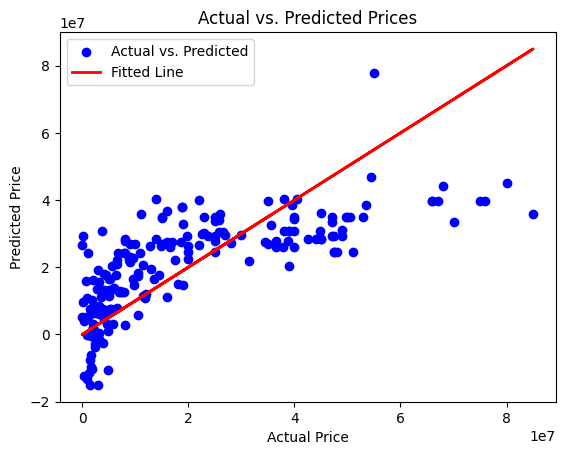

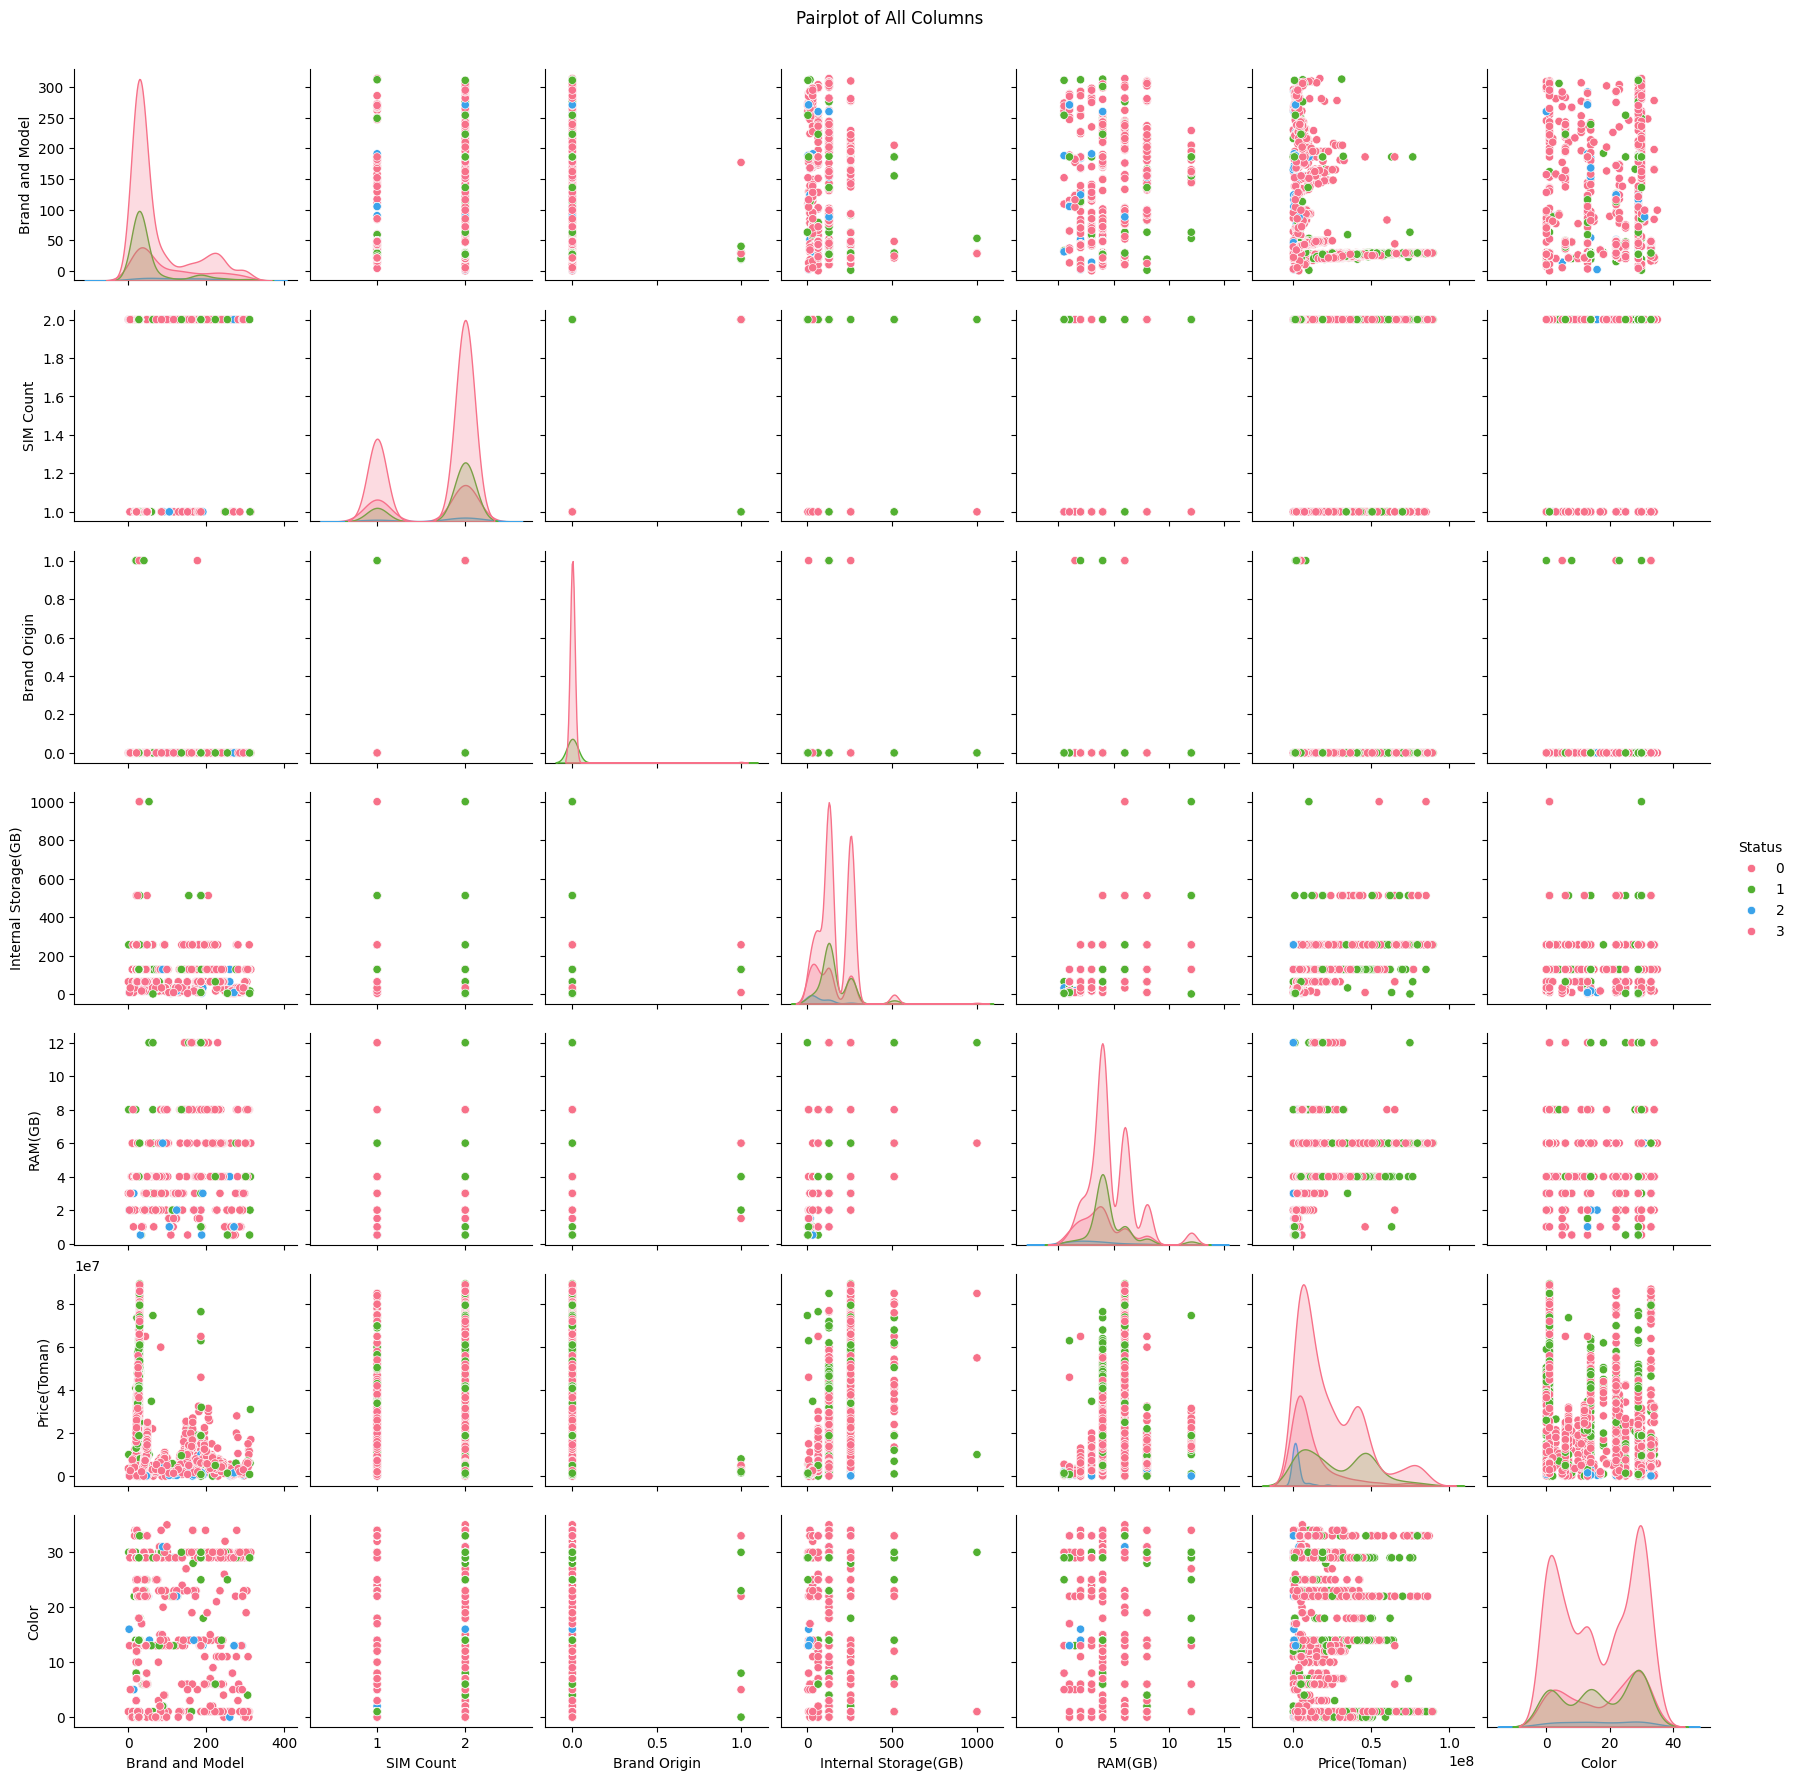

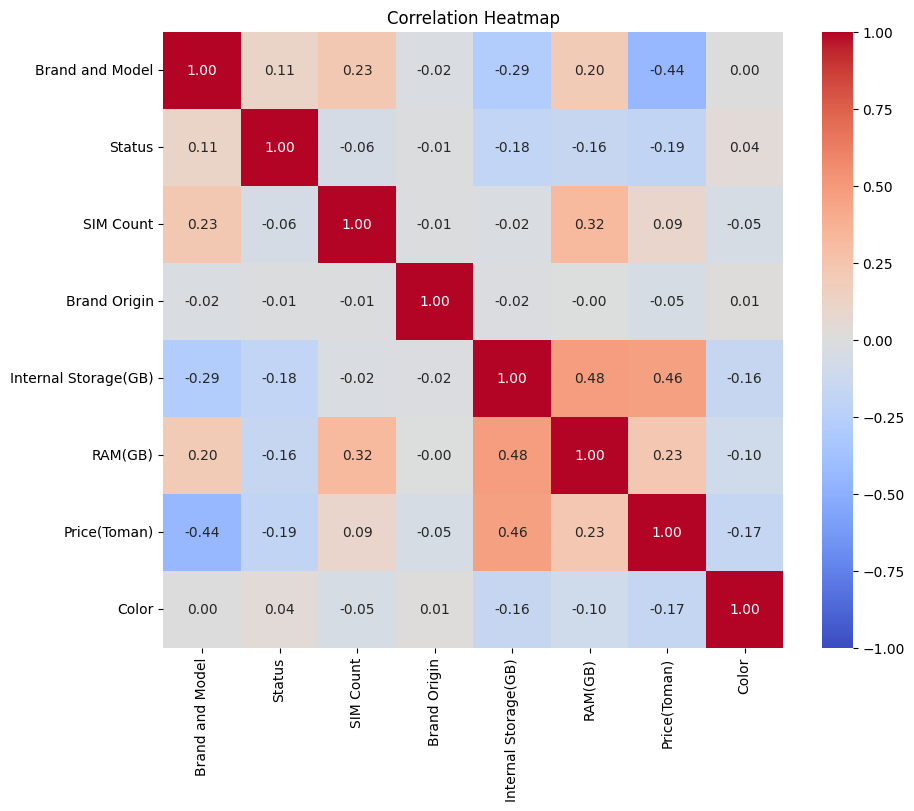

In [8]:
# Label encoding for categorical columns
label_encoder = LabelEncoder()
categorical_cols = ['Color', 'Brand Origin', 'Brand and Model', 'Status']
for col in categorical_cols:
    mobile_df[col] = label_encoder.fit_transform(mobile_df[col])

# Remove outliers based on Price(Toman)
Q1 = mobile_df['Price(Toman)'].quantile(0.25)
Q3 = mobile_df['Price(Toman)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mobile_df = mobile_df[(mobile_df['Price(Toman)'] >= lower_bound) & (mobile_df['Price(Toman)'] <= upper_bound)]


# Split into X and y
X = mobile_df.drop('Price(Toman)', axis=1)
y = mobile_df['Price(Toman)']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=519)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


# Scatter plot with fitted line
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Fitted Line')

plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

# Pairplot
sns.pairplot(mobile_df, hue='Status', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of All Columns', y=1.02)
plt.show()

# Correlation matrix
corr_matrix = mobile_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
